<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL3%20(PyTorch)/note/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class vocab

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/korean-hate-speech-detection/train.hate.csv')
dev_df = pd.read_csv('/content/drive/MyDrive/korean-hate-speech-detection/dev.hate.csv')
test_df = pd.read_csv('/content/drive/MyDrive/korean-hate-speech-detection/test.hate.no_label.csv')

train_df.shape, dev_df.shape, test_df.shape

((7896, 2), (471, 2), (974, 1))

In [ ]:
train_df

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate
...,...,...
7891,힘내세요~ 응원합니다!!,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,none


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  7896 non-null   object
 1   label     7896 non-null   object
dtypes: object(2)
memory usage: 123.5+ KB


In [ ]:
train_df['label'].value_counts()

none         3486
offensive    2499
hate         1911
Name: label, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['label'])

In [6]:
train_df

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,0
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,1
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",0
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",1
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,0
...,...,...
7891,힘내세요~ 응원합니다!!,1
7892,힘내세요~~삼가 고인의 명복을 빕니다..,1
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,1
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,1


In [10]:
train_df.to_csv('train.csv', index=False)
dev_df.to_csv('dev.csv', index=False)

In [7]:
# requirements
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 91
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 688 kB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 448 kB 70.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-12-26 10:08:08--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.

In [11]:
from konlpy.tag import Mecab
from nltk import FreqDist

In [13]:
train_df['comments'] = train_df['comments'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
dev_df['comments'] = dev_df['comments'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_df

,comments,label
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네,0
1,한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요ㅠ,1
2,못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...,0
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,1
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각이 없노,0
...,...,...
7891,힘내세요 응원합니다,1
7892,힘내세요삼가 고인의 명복을 빕니다,1
7893,힘내세용 항상 응원합니닷,1
7894,힘내소연기로 답해요나도 살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,1


In [14]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기
tokenizer = Mecab()
tokenized = []

for sentence in train_df['comments']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [15]:
tokenized[:1]

[['현재',
  '호텔',
  '주인',
  '심정',
  '아',
  '난',
  '마른',
  '하늘',
  '날벼락',
  '맞',
  '고',
  '호텔',
  '망하',
  '게',
  '생겼',
  '는데',
  '누군',
  '계속',
  '추모',
  '받',
  '네']]

In [16]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 13292


In [17]:
vocab['거라']

4

In [18]:
# vocab_size = 12000
# # 상위 vocab_size개의 단어만 보존
# vocab = vocab.most_common(vocab_size)
# print('단어 집합의 크기 : {}'.format(len(vocab)))

In [19]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [20]:
encoded[:1]

[[0,
  0,
  0,
  0,
  13255,
  12907,
  0,
  0,
  0,
  13038,
  13252,
  0,
  0,
  11005,
  0,
  0,
  0,
  0,
  0,
  11674,
  9603]]

리뷰의 최대 길이 : 61
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 15.661221


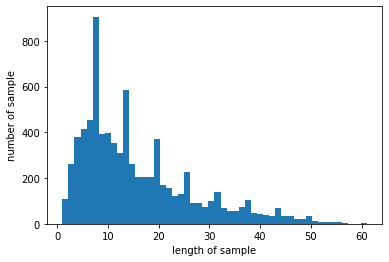

In [21]:
max_len = max(len(l) for l in encoded)

print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [22]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 61
리뷰의 최소 길이 : 61
리뷰의 평균 길이 : 61.000000


# Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

np.random.seed(0)
torch.manual_seed(0)

# 현재 컴퓨터에서 CUDA(GPU Library)를 이용할 수 있는지 알아보기 위한 Flag
USE_CUDA = torch.cuda.is_available()
# USE_CUDA가 True일 경우, GPU를 할당 그 외엔 CPU 메모리 할당
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
EPOCHS = 30
lr = 1e-3

print(DEVICE)

cpu


In [ ]:
from torchtext.legacy import data

tokenizer = Mecab()

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   preprocessing=lambda x: int(x),
                   is_target=True)

In [ ]:
from torchtext.legacy.data import TabularDataset

train_data, valid_data = TabularDataset.splits(path='.',
					train='/content/train.txt',
                    test='/content/dev.txt',
					format='tsv', 
					fields=[('comments', TEXT), ('label', LABEL)],
                    skip_header=True)

In [ ]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(valid_data)))

훈련 샘플의 개수 : 7896
테스트 샘플의 개수 : 471


In [ ]:
print(vars(train_data[0]))

{'comments': ['(', '현재', '호텔', '주인', '심정', ')', '아', '18', '난', '마른', '하늘', '에', '날벼락', '맞', '고', '호텔', '망하', '게', '생겼', '는데', '누군', '계속', '추모', '받', '네', '.', '...,', '0']}


In [ ]:
TEXT.build_vocab(train_data, min_freq=5, max_size=10000)

In [ ]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 2972


In [ ]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f07730bd750>>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '는': 4, '하': 5, '고': 6, '들': 7, '다': 8, '가': 9, '은': 10, '도': 11, '?': 12, '지': 13, '에': 14, '네': 15, '거': 16, '을': 17, '게': 18, '한': 19, '..': 20, '나': 21, '있': 22, '안': 23, '보': 24, '면': 25, 'ㅋㅋ': 26, '아': 27, '없': 28, '는데': 29, '잘': 30, '좋': 31, '냐': 32, 'ㅋㅋㅋ': 33, '만': 34, '!': 35, '어': 36, '같': 37, '겠': 38, '여자': 39, ',': 40, '의': 41, '사람': 42, '로': 43, '아니': 44, '왜': 45, '니': 46, '를': 47, '되': 48, '했': 49, '것': 50, '으로': 51, '해': 52, '기': 53, '좀': 54, '말': 55, '에서': 56, '음': 57, '너무': 58, '~': 59, '진짜': 60, '주': 61, '야': 62, '라': 63, '었': 64, '듯': 65, '인': 66, '남자': 67, '뭐': 68, '못': 69, '할': 70, '살': 71, '애': 72, '더': 73, '많': 74, '세요': 75, '않': 76, '때': 77, '서': 78, '시': 79, '네요': 80, '으면': 81, '적': 82, '일': 83, '씨': 84, '알': 85, '건': 86, '그': 87, '았': 88, '연기': 89, '수': 90, '나오': 91, '인데': 92, '자': 93, '그냥': 94, '지만': 95, '결혼'

In [ ]:
from torchtext.legacy.data import Iterator

batch_size = 20
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [ ]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.text)

ValueError: ignored

In [ ]:
class make_dataset(Dataset):
  def __init__(self, X, y):
    self.X = X.astype(np.float32)
    self.y = y.astype(np.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

In [ ]:
train_dataset = make_dataset(X_train, y_train)
test_dataset = make_dataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class create_model(nn.Module):
  def __init__(self):
    super(create_model, self).__init__()
    self.linear1 = nn.Sequential(nn.Linear(13, 64), nn.ReLU(), nn.Linear(64, 32))
    self.linear2 = nn.Sequential(nn.Linear(32, 16), nn.ReLU(), nn.Linear(16, 8))
    self.linear3 = nn.Sequential(nn.Linear(8, 4), nn.ReLU(), nn.Linear(4, 1))

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    out = self.linear3(out)
    return out

model = create_model()
optimizer = torch.optim.Adam(model.parameters(), lr=lr) 
criterion = nn.MSELoss()